In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import helpers 
import numpy

# Класс с парамеирами чтобы их не пересчитывать каждый раз
df_params = helpers.DFParams()

# Таблица данных
data = [
    {"t": 1, "tx": 14, "ty": 222},
    {"t": 2, "tx": 16, "ty": 241},
    {"t": 3, "tx": 17, "ty": 243},
    {"t": 4, "tx": 19, "ty": 285},
    {"t": 5, "tx": 18, "ty": 253},
    {"t": 6, "tx": 15, "ty": 247},
    {"t": 7, "tx": 14, "ty": 246},
    {"t": 8, "tx": 18, "ty": 276},
    {"t": 9, "tx": 17, "ty": 261},
    {"t": 10, "tx": 15, "ty": 254},
    {"t": 11, "tx": 13, "ty": 229},
    {"t": 12, "tx": 16, "ty": 249},
    {"t": 13, "tx": 17, "ty": 252},
    {"t": 14, "tx": 19, "ty": 279},
    {"t": 15, "tx": 18, "ty": 262},
    {"t": 16, "tx": 20, "ty": 275},
    {"t": 17, "tx": 12, "ty": 211},
    {"t": 18, "tx": 13, "ty": 220},
    {"t": 19, "tx": 12, "ty": 218},
    {"t": 20, "tx": 14, "ty": 232},
]

df = pd.DataFrame(data, columns=["t", "tx", "ty"])

# # print dataset (table)
df


TypeError: type 'Series' is not subscriptable

In [ ]:

helpers.ScatterPlotOfTyVsTx(df)

a0^ = 119.70, a1^ = 8.08


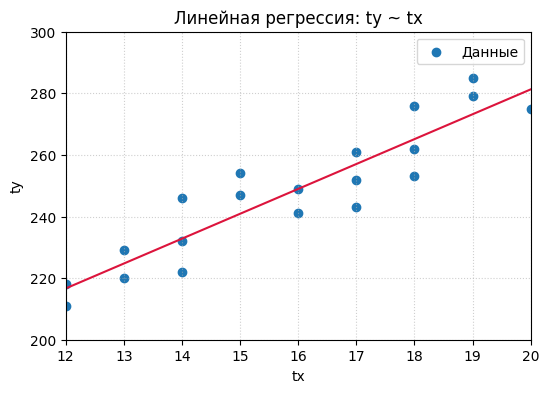

In [77]:
helpers.EstimateLinearRegressionParams(df)

In [ ]:
# Повторное применение преобразований и вывод расширенной таблицы
x_bar = df_params.x_bar(df["tx"])
y_bar = df["ty"].mean()

pipe_df = df.copy()
pipe_df["tx^2"] = pipe_df["tx"] ** 2
pipe_df["(tx-x̄)^2"] = (pipe_df["tx"] - x_bar) ** 2
pipe_df["(ty-ȳ)^2"] = (pipe_df["ty"] - y_bar) ** 2
pipe_df["(tx-x̄)(ty-ȳ)"] = (pipe_df["tx"] - x_bar) * (pipe_df["ty"] - y_bar)

# print dataset (table)
pipe_df

,t,tx,ty,tx^2,(tx-x̄)^2,(ty-ȳ)^2,(tx-x̄)(ty-ȳ)
0,1,14,222,196,3.4225,663.0625,47.6375
1,2,16,241,256,0.0225,45.5625,-1.0125
2,3,17,243,289,1.3225,22.5625,-5.4625
3,4,19,285,361,9.9225,1387.5625,117.3375
4,5,18,253,324,4.6225,27.5625,11.2875
5,6,15,247,225,0.7225,0.5625,0.6375
6,7,14,246,196,3.4225,3.0625,3.2375
7,8,18,276,324,4.6225,798.0625,60.7375
8,9,17,261,289,1.3225,175.5625,15.2375
9,10,15,254,225,0.7225,39.0625,-5.3125


In [79]:
# Расчёт коэффициентов по формулам:
# a1^ = sum (tx - x̄)(ty - ȳ) / sum (tx - x̄)^2
# a0^ = ȳ - a1^ * x̄
x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)

x_bar = x.mean()
y_bar = y.mean()

Sxx = numpy.sum((x - x_bar) ** 2)
Sxy = numpy.sum((x - x_bar) * (y - y_bar))

a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar

print(f"T = {T}")
print(f"x̄ = {x_bar:.3f}, ȳ = {y_bar:.3f}")
print(f"Sxx = {Sxx:.3f}, Sxy = {Sxy:.3f}")
print(f"a1^ = {a1_hat:.2f}")
print(f"a0^ = {a0_hat:.2f}")


T = 20
x̄ = 15.850, ȳ = 247.750
Sxx = 112.550, Sxy = 909.250
a1^ = 8.08
a0^ = 119.70


In [80]:
# Прогнозные значения, ошибки и вклад в оценку дисперсии
# x = df["tx"].to_numpy(dtype=float)
# y = df["ty"].to_numpy(dtype=float)
# T = len(df)

# # Коэффициенты модели (на случай, если предыдущая ячейка не запускалась)
# x_bar = x.mean()
# y_bar = y.mean()
# Sxx = numpy.sum((x - x_bar) ** 2)
# Sxy = numpy.sum((x - x_bar) * (y - y_bar))
# a1_hat = Sxy / Sxx
# a0_hat = y_bar - a1_hat * x_bar

# Столбцы модели
y_hat = a0_hat + a1_hat * df["tx"]
e = df["ty"] - y_hat
e2 = e ** 2
st2 = e2 / (T - 2)

# adding new columns to our df 
pipe_df["ŷ"] = y_hat.round(3)
pipe_df["e"] = e.round(3)
pipe_df["e^2"] = e2.round(3)
pipe_df["s_t^2"] = st2.round(3)


# Строки сумма и среднее
sum_row = pipe_df.drop(columns=["t"]).sum(numeric_only=True)
mean_row = pipe_df.drop(columns=["t"]).mean(numeric_only=True)
sum_row["t"] = "сумма"
mean_row["t"] = "среднее"
summary = pd.DataFrame([sum_row, mean_row])[pipe_df.columns]

with pd.option_context('display.float_format', '{:.3f}'.format):
    display(pipe_df)
    display(summary)


,t,tx,ty,tx^2,(tx-x̄)^2,(ty-ȳ)^2,(tx-x̄)(ty-ȳ),ŷ,e,e^2,s_t^2
0,1,14,222,196,3.422,663.062,47.637,232.805,-10.805,116.738,6.485
1,2,16,241,256,0.023,45.562,-1.013,248.962,-7.962,63.390,3.522
2,3,17,243,289,1.323,22.562,-5.463,257.040,-14.040,197.134,10.952
3,4,19,285,361,9.923,1387.562,117.338,273.198,11.802,139.295,7.739
4,5,18,253,324,4.623,27.562,11.288,265.119,-12.119,146.872,8.160
5,6,15,247,225,0.722,0.562,0.637,240.883,6.117,37.416,2.079
6,7,14,246,196,3.422,3.062,3.237,232.805,13.195,174.120,9.673
7,8,18,276,324,4.623,798.062,60.738,265.119,10.881,118.395,6.577
8,9,17,261,289,1.323,175.562,15.238,257.040,3.960,15.678,0.871
9,10,15,254,225,0.722,39.062,-5.312,240.883,13.117,172.051,9.558


,t,tx,ty,tx^2,(tx-x̄)^2,(ty-ȳ)^2,(tx-x̄)(ty-ȳ),ŷ,e,e^2,s_t^2
0,сумма,317.000,4955.000,5137.000,112.550,8709.750,909.250,4955.000,0.000,1364.255,75.791
1,среднее,15.850,247.750,256.850,5.627,435.488,45.462,247.750,0.000,68.213,3.790


In [81]:
# Несмещенная оценка дисперсии: σ^2 = Σ s_t^2 = SSE/(T-2)
# Робастно пересчитаем коэффициенты на случай, если их нет в окружении
x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)

try:
    _ = a0_hat + a1_hat
    a0h = float(a0_hat)
    a1h = float(a1_hat)
except NameError:
    x_bar = x.mean(); y_bar = y.mean()
    Sxx = numpy.sum((x - x_bar) ** 2)
    Sxy = numpy.sum((x - x_bar) * (y - y_bar))
    a1h = Sxy / Sxx
    a0h = y_bar - a1h * x_bar

resid = y - (a0h + a1h * x)
SSE = float(numpy.sum(resid ** 2))
sigma2_hat = SSE / (T - 2)

print(f"SSE = {SSE:.3f}")
print(f"Unbiased variance estimate σ^2 = Σ s_t^2 = {sigma2_hat:.3f}")

# Дополнительная проверка, если ранее считали s_t^2 в pipe_df
if 'pipe_df' in globals() and 's_t^2' in pipe_df.columns:
    print(f"Σ s_t^2 (из таблицы) = {pipe_df['s_t^2'].sum():.3f}")


SSE = 1364.254
Unbiased variance estimate σ^2 = Σ s_t^2 = 75.792
Σ s_t^2 (из таблицы) = 75.791


In [82]:
# Несмещённые оценки дисперсий a1^ и a0^
# Используем формулы: Var(a1^) = s^2 / Sxx; Var(a0^) = s^2 * (1/T + x̄^2 / Sxx)
# s^2 = SSE/(T-2)
x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)

# Коэффициенты и базовые суммы (пересчитываем на всякий случай)
x_bar = x.mean()
y_bar = y.mean()

Sxx = numpy.sum((x - x_bar) ** 2)
Sxy = numpy.sum((x - x_bar) * (y - y_bar))

a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar

# SSE и s^2
resid = y - (a0_hat + a1_hat * x)
SSE = float(numpy.sum(resid ** 2))
s2 = SSE / (T - 2)

# Несмещённые оценки дисперсий
var_a1 = s2 / Sxx
var_a0 = s2 * (1.0 / T + (x_bar ** 2) / Sxx)

print(f"Sxx = {Sxx:.6f}, x̄ = {x_bar:.6f}, T = {T}")
print(f"SSE = {SSE:.6f}, s^2 = {s2:.6f}")
print(f"Var(a1^) = s_a1^2 = {var_a1:.6f}")
print(f"Var(a0^) = s_a0^2 = {var_a0:.6f}")


Sxx = 112.550000, x̄ = 15.850000, T = 20
SSE = 1364.254109, s^2 = 75.791895
Var(a1^) = s_a1^2 = 0.673406
Var(a0^) = s_a0^2 = 172.964444


In [83]:
# Квантили распределения Стьюдента t_{γ, T-2} для γ ∈ {0.90, 0.95, 0.99}
T = len(df)
dfree = T - 2
levels = [0.90, 0.95, 0.99]

quantiles = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        quantiles[g] = float(student_t.ppf(g, df=dfree))
    source = "scipy"
except Exception:
    # Запасной вариант: если df=18, используем табличные значения; иначе нормальная аппроксимация
    if dfree == 18:
        table = {0.90: 1.330, 0.95: 1.734, 0.99: 2.552}
        quantiles = {g: table[g] for g in levels}
        source = "lookup(df=18)"
    else:
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            quantiles[g] = float(nd.inv_cdf(g))
        source = "normal-approx"

q_df = pd.DataFrame({
    "gamma": levels,
    f"t_gamma (df={dfree})": [quantiles[g] for g in levels],
})

print(f"Computed Student-t one-sided quantiles with df={dfree} using {source}.")
display(q_df)


Computed Student-t one-sided quantiles with df=18 using lookup(df=18).


,gamma,t_gamma (df=18)
0,0.90,1.330
1,0.95,1.734
2,0.99,2.552


In [84]:
# Наблюдаемое значение t-статистики для a1^ и проверка значимости (двусторонний тест)
import math

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)
dfree = T - 2

# Оценки коэффициентов и остатков
x_bar = x.mean(); y_bar = y.mean()
Sxx = numpy.sum((x - x_bar) ** 2)
Sxy = numpy.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)
SSE = float(numpy.sum(resid ** 2))
s2 = SSE / dfree

# Стандартная ошибка a1^ и t-наблюдаемое
se_a1 = math.sqrt(s2 / Sxx)
t_obs = a1_hat / se_a1

# Критические значения (двусторонние): t_{(1+γ)/2, df}
levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=dfree))
    source = "scipy"
except Exception:
    # Табличные значения для df=18
    if dfree == 18:
        crit = {0.90: 1.734, 0.95: 2.101, 0.99: 2.878}
        source = "lookup(df=18)"
    else:
        # Нормальная аппроксимация
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source = "normal-approx"

print(f"df = {dfree}, t_obs = {t_obs:.4f} (source={source})")

# Решения по уровням
for g in levels:
    decision = "значим (отклоняем H0: a1=0)" if abs(t_obs) > crit[g] else "незначим (не отклоняем H0)"
    print(f"γ={g:.2f}: t_crit={(crit[g]):.3f}, |t_obs|={(abs(t_obs)):.3f} → {decision}")


df = 18, t_obs = 9.8446 (source=lookup(df=18))
γ=0.90: t_crit=1.734, |t_obs|=9.845 → значим (отклоняем H0: a1=0)
γ=0.95: t_crit=2.101, |t_obs|=9.845 → значим (отклоняем H0: a1=0)
γ=0.99: t_crit=2.878, |t_obs|=9.845 → значим (отклоняем H0: a1=0)


In [85]:
# Наблюдаемое значение t-статистики для a0^ и проверка значимости (двусторонний тест)
import math

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)
dfree = T - 2

# Оценки коэффициентов и остатки
x_bar = x.mean(); y_bar = y.mean()
Sxx = numpy.sum((x - x_bar) ** 2)
Sxy = numpy.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)
SSE = float(numpy.sum(resid ** 2))
s2 = SSE / dfree

# Стандартная ошибка a0^ и t-наблюдаемое
se_a0 = math.sqrt(s2 * (1.0 / T + (x_bar ** 2) / Sxx))
t_obs0 = a0_hat / se_a0

# Критические значения (двусторонние): t_{(1+γ)/2, df}
levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=dfree))
    source = "scipy"
except Exception:
    # Табличные значения для df=18
    if dfree == 18:
        crit = {0.90: 1.734, 0.95: 2.101, 0.99: 2.878}
        source = "lookup(df=18)"
    else:
        # Нормальная аппроксимация
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source = "normal-approx"

print(f"df = {dfree}, t_obs(a0^) = {t_obs0:.4f} (source={source})")
print(f"a0^ = {a0_hat:.3f}, se(a0^) = {se_a0:.3f}")

# Решения по уровням
for g in levels:
    decision = "значим (отклоняем H0: a0=0)" if abs(t_obs0) > crit[g] else "незначим (не отклоняем H0)"
    print(f"γ={g:.2f}: t_crit={(crit[g]):.3f}, |t_obs|={(abs(t_obs0)):.3f} → {decision}")


df = 18, t_obs(a0^) = 9.1018 (source=lookup(df=18))
a0^ = 119.704, se(a0^) = 13.152
γ=0.90: t_crit=1.734, |t_obs|=9.102 → значим (отклоняем H0: a0=0)
γ=0.95: t_crit=2.101, |t_obs|=9.102 → значим (отклоняем H0: a0=0)
γ=0.99: t_crit=2.878, |t_obs|=9.102 → значим (отклоняем H0: a0=0)


In [86]:
# Доверительные интервалы для a1^ при γ ∈ {0.90, 0.95, 0.99}
import math

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)
dfree = T - 2

# Переоценим параметры и дисперсию на всякий случай
x_bar = x.mean(); y_bar = y.mean()
Sxx = numpy.sum((x - x_bar) ** 2)
Sxy = numpy.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)
SSE = float(numpy.sum(resid ** 2))
s2 = SSE / dfree
se_a1 = math.sqrt(s2 / Sxx)

levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=dfree))  # двусторонний множитель
    source = "scipy"
except Exception:
    # Табличные значения для df=18 (двусторонние множители)
    if dfree == 18:
        crit = {0.90: 1.734, 0.95: 2.101, 0.99: 2.878}
        source = "lookup(df=18)"
    else:
        # Нормальная аппроксимация
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source = "normal-approx"

rows = []
for g in levels:
    c = crit[g]
    lo = a1_hat - c * se_a1
    hi = a1_hat + c * se_a1
    rows.append({
        "gamma": g,
        "t_mult": c,
        "a1^": a1_hat,
        "se(a1^)": se_a1,
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci_df = pd.DataFrame(rows)
print(f"df = {dfree}, источник крит. значений: {source}")
display(ci_df.round(4))


df = 18, источник крит. значений: lookup(df=18)


,gamma,t_mult,a1^,se(a1^),CI_lower,CI_upper
0,0.90,1.734,8.0786,0.8206,6.6557,9.5016
1,0.95,2.101,8.0786,0.8206,6.3545,9.8027
2,0.99,2.878,8.0786,0.8206,5.7169,10.4404


In [87]:
# Доверительные интервалы для a0^ при γ ∈ {0.90, 0.95, 0.99}
import math
import numpy as np

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)
dfree = T - 2

# Переоценим параметры и дисперсию на всякий случай
x_bar = x.mean(); y_bar = y.mean()
Sxx = np.sum((x - x_bar) ** 2)
Sxy = np.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)
SSE = float(np.sum(resid ** 2))
s2 = SSE / dfree
se_a0 = math.sqrt(s2 * (1.0 / T + (x_bar ** 2) / Sxx))

levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import t as student_t
    for g in levels:
        crit[g] = float(student_t.ppf((1 + g) / 2.0, df=dfree))  # двусторонний множитель
    source = "scipy"
except Exception:
    # Табличные значения для df=18 (двусторонние множители)
    if dfree == 18:
        crit = {0.90: 1.734, 0.95: 2.101, 0.99: 2.878}
        source = "lookup(df=18)"
    else:
        # Нормальная аппроксимация
        from statistics import NormalDist
        nd = NormalDist()
        for g in levels:
            crit[g] = float(nd.inv_cdf((1 + g) / 2.0))
        source = "normal-approx"

rows = []
for g in levels:
    c = crit[g]
    lo = a0_hat - c * se_a0
    hi = a0_hat + c * se_a0
    rows.append({
        "gamma": g,
        "t_mult": c,
        "a0^": a0_hat,
        "se(a0^)": se_a0,
        "CI_lower": lo,
        "CI_upper": hi,
    })

ci0_df = pd.DataFrame(rows)
print(f"df = {dfree}, источник крит. значений: {source}")
display(ci0_df.round(4))


df = 18, источник крит. значений: lookup(df=18)


,gamma,t_mult,a0^,se(a0^),CI_lower,CI_upper
0,0.90,1.734,119.7037,13.1516,96.8988,142.5086
1,0.95,2.101,119.7037,13.1516,92.0722,147.3352
2,0.99,2.878,119.7037,13.1516,81.8534,157.5540


In [88]:
# Коэффициент детерминации R^2 и заключение об адекватности модели
import numpy as np

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)

# Переоценим параметры и остатки
x_bar = x.mean(); y_bar = y.mean()
Sxx = np.sum((x - x_bar) ** 2)
Sxy = np.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)

SSE = float(np.sum(resid ** 2))            # ∑ e_t^2
SST = float(np.sum((y - y_bar) ** 2))      # ∑ (y_t - ȳ)^2
R2 = 1.0 - SSE / SST

# Простое текстовое заключение по порогам
if R2 >= 0.7:
    verdict = "высокая объясняющая способность (адекватная модель)"
elif R2 >= 0.5:
    verdict = "умеренная объясняющая способность"
else:
    verdict = "низкая объясняющая способность"

print(f"SSE = {SSE:.3f}, SST = {SST:.3f}")
print(f"R^2 = 1 - SSE/SST = {R2:.4f}")
print(f"Предварительное заключение: {verdict}")


SSE = 1364.254, SST = 8709.750
R^2 = 1 - SSE/SST = 0.8434
Предварительное заключение: высокая объясняющая способность (адекватная модель)


In [89]:
# Квантили распределения Фишера F_{γ; (2, T−2)} для γ ∈ {0.90, 0.95, 0.99}
T = len(df)
df1 = 2
df2 = T - 2
levels = [0.90, 0.95, 0.99]

quantiles = {}
try:
    from scipy.stats import f as fisher_f
    for g in levels:
        quantiles[g] = float(fisher_f.ppf(g, dfn=df1, dfd=df2))
    source = "scipy"
except Exception as ex:
    source = f"unavailable: {type(ex).__name__}"
    print("SciPy недоступен для точного расчёта квантилей F. Установите scipy или используйте таблицы.")

if quantiles:
    q_df = pd.DataFrame({
        "gamma": levels,
        f"F_gamma (df1={df1}, df2={df2})": [quantiles[g] for g in levels],
    })
    print(f"Computed Fisher F upper-tail quantiles with df1={df1}, df2={df2} using {source}.")
    display(q_df)
else:
    print(f"Не удалось вычислить квантили F; df1={df1}, df2={df2}.")


SciPy недоступен для точного расчёта квантилей F. Установите scipy или используйте таблицы.
Не удалось вычислить квантили F; df1=2, df2=18.


In [90]:
# Наблюдаемое значение F для R^2 и проверка значимости при γ ∈ {0.90, 0.95, 0.99}
import numpy as np

x = df["tx"].to_numpy(dtype=float)
y = df["ty"].to_numpy(dtype=float)
T = len(df)
df1, df2 = 1, T - 2

# Оценим R^2
x_bar = x.mean(); y_bar = y.mean()
Sxx = np.sum((x - x_bar) ** 2)
Sxy = np.sum((x - x_bar) * (y - y_bar))
a1_hat = Sxy / Sxx
a0_hat = y_bar - a1_hat * x_bar
resid = y - (a0_hat + a1_hat * x)
SSE = float(np.sum(resid ** 2))
SST = float(np.sum((y - y_bar) ** 2))
R2 = 1.0 - SSE / SST

F_R = (R2 / (1.0 - R2)) * df2

levels = [0.90, 0.95, 0.99]
crit = {}
try:
    from scipy.stats import f as fisher_f
    for g in levels:
        crit[g] = float(fisher_f.ppf(g, dfn=df1, dfd=df2))
    source = "scipy"
except Exception:
    # Табличные значения для df1=1, df2=18 (наш случай при T=20)
    if df1 == 1 and df2 == 18:
        crit = {0.90: 2.526, 0.95: 4.414, 0.99: 8.286}
        source = "lookup(df1=1,df2=18)"
    else:
        source = "unavailable"

print(f"R^2 = {R2:.4f}, F_R = {F_R:.4f}, df1={df1}, df2={df2} (source={source})")

rows = []
for g in levels:
    fcrit = crit.get(g, float('nan'))
    decision = "значим (отклоняем H0: R^2=0)" if np.isfinite(fcrit) and F_R > fcrit else "незначим (не отклоняем H0)"
    rows.append({"gamma": g, "F_crit": fcrit, "F_R": F_R, "decision": decision})

display(pd.DataFrame(rows))


R^2 = 0.8434, F_R = 96.9166, df1=1, df2=18 (source=lookup(df1=1,df2=18))


,gamma,F_crit,F_R,decision
0,0.90,2.526,96.916641,значим (отклоняем H0: R^2=0)
1,0.95,4.414,96.916641,значим (отклоняем H0: R^2=0)
2,0.99,8.286,96.916641,значим (отклоняем H0: R^2=0)
